# 시계열 자료분석 HW04

### 1.

In [187]:
## 4 ARMA(1,2)
x = arima.sim(n=10000, list(order=c(1,0,2), ar = -0.6 , ma=c(0.2, 0.5))) 

In [205]:
r0 = var(x)
r1 = cov(as.vector(x)[1:length(x)-1] , x[2:length(x)]) ;
r2 = cov(as.vector(x)[1:(length(x)-2)] , x[3:length(x)]) ;
r3 = cov(as.vector(x)[1:(length(x)-3)] , x[4:length(x)]) ;
r4 = cov(as.vector(x)[1:(length(x)-4)] , x[5:length(x)]) ;
r5 = cov(as.vector(x)[1:(length(x)-5)] , x[6:length(x)]) ;
print(paste("r0:" , round(r0 ,2) , "r1:" , round(r1,2) , "r2:" , round(r2,2) , "r3:" , round(r3,2) , "r4:" , round(r4,2), "r5:" , round(r5,2)  ))

[1] "r0: 2.05 r1: -1.26 r2: 1.28 r3: -0.78 r4: 0.5 r5: -0.3"


In [197]:
length(x[2:length(x)])

[1] 9999


Autocorrelations of series 'x', by lag

     0      1      2      3      4      5 
 1.000 -0.612  0.623 -0.381  0.243 -0.146 


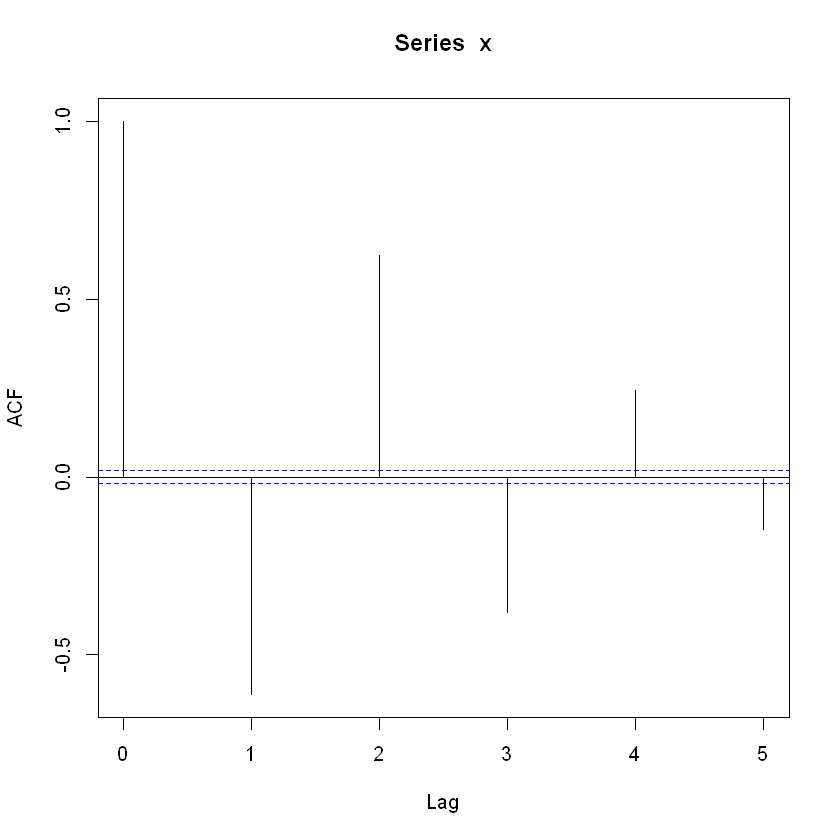

In [188]:
print(acf(x , lag = 5))


Partial autocorrelations of series 'x', by lag

     1      2      3      4      5 
-0.612  0.397  0.175 -0.205 -0.031 


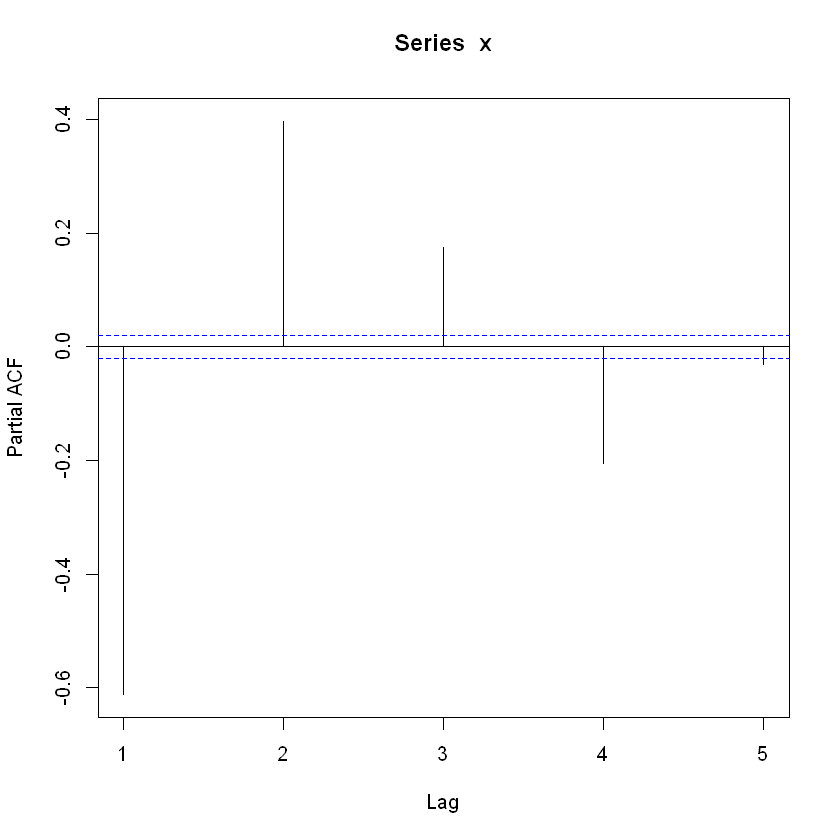

In [189]:
print(pacf(x, lag = 5))

In [157]:
# 5 ARMA(2,1)
e = rnorm(10000)
z = c()
z[1] = z[2] = 0 
for (i in 3:10000){
    z[i] = 1.5*z[i-1] -0.7*z[i-2] + 100 + e[i] -0.5*e[i-1] }

In [ ]:
z = z[100:990]

In [206]:
r0 = var(z)
r1 = cov(as.vector(z)[1:length(z)-1] , z[2:length(z)]) ;
r2 = cov(as.vector(z)[1:(length(z)-2)] , z[3:length(z)]) ;
r3 = cov(as.vector(z)[1:(length(z)-3)] , z[4:length(z)]) ;
r4 = cov(as.vector(z)[1:(length(z)-4)] , z[5:length(z)]) ;
r5 = cov(as.vector(z)[1:(length(z)-5)] , z[6:length(z)]) ;
print(paste("r0:" , round(r0 ,2) , "r1:" , round(r1,2) , "r2:" , round(r2,2) , "r3:" , round(r3,2) , "r4:" , round(r4,2), "r5:" , round(r5,2)  ))

[1] "r0: 3.43 r1: 2.72 r2: 1.66 r3: 0.54 r4: -0.37 r5: -0.91"


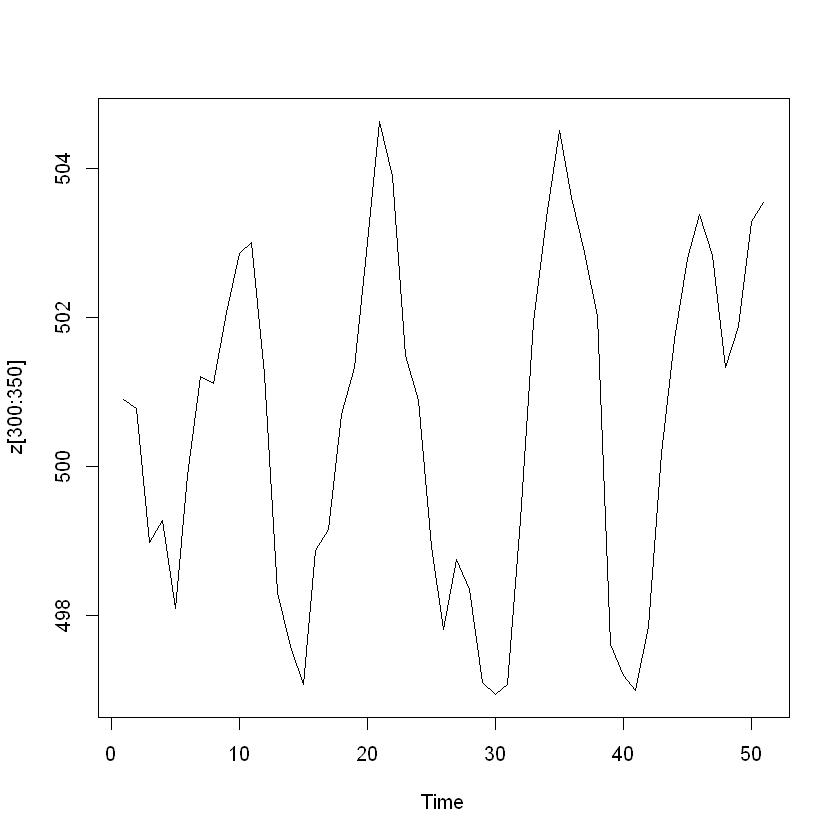

In [160]:
ts.plot(z[300:350])

## 201822037 통계학과 한민주


Autocorrelations of series 'z', by lag

     0      1      2      3      4      5 
 1.000  0.793  0.482  0.156 -0.106 -0.262 


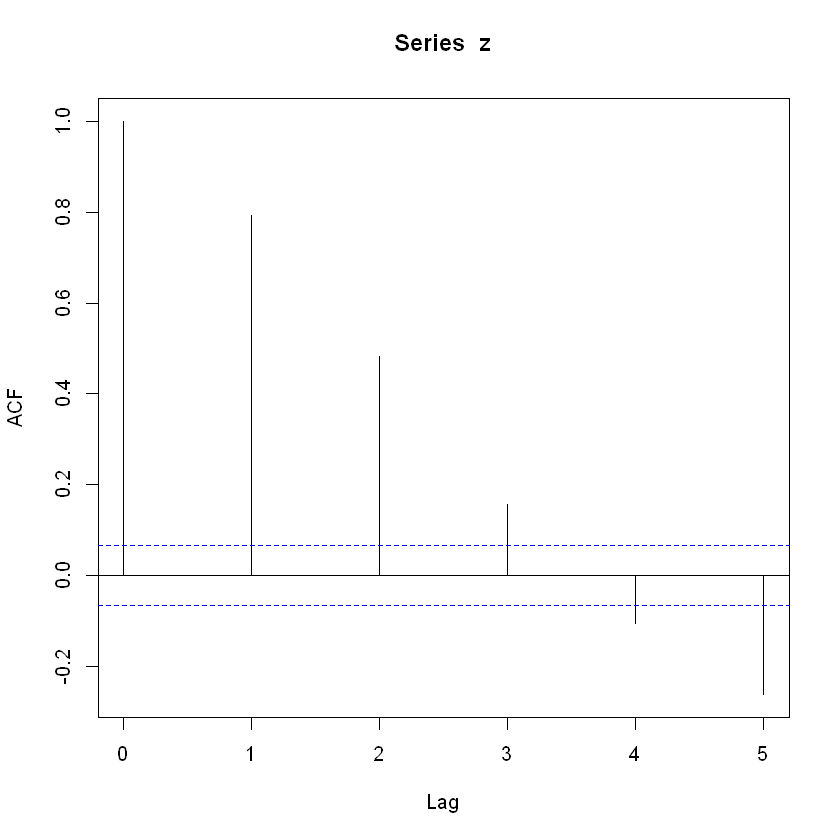

In [162]:
print(acf(z,lag = 5))


Partial autocorrelations of series 'z', by lag

     1      2      3      4      5 
 0.793 -0.396 -0.203 -0.078 -0.018 


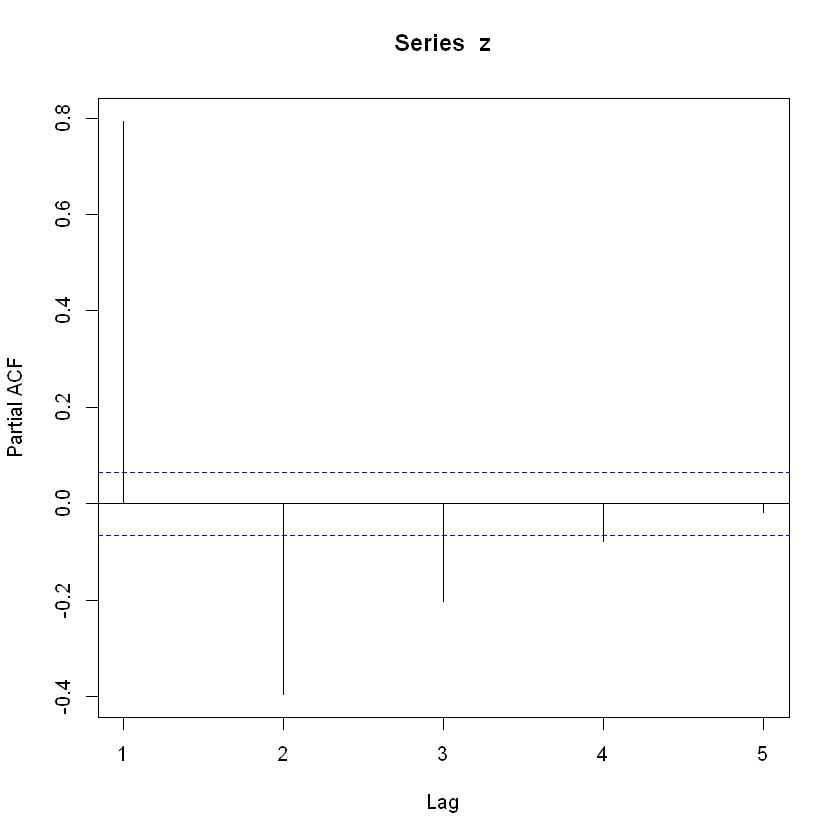

In [164]:
print(pacf(z, lag= 5))

경로 지정

In [1]:
setwd("C:\\Users\\user\\OneDrive\\바탕 화면\\전공 수업 자료\\시계열자료분석_이영미\\제5판_시계열분석\\data")

### 4. `ex7_3.txt`

데이터 불러오기

In [99]:
z = scan("ex7_3.txt")

$(1-B^4)Z_t = (1-0.5B)\epsilon_t$ , $\epsilon_t \sim WN(0,25)$

#### (1) 시계열 그림

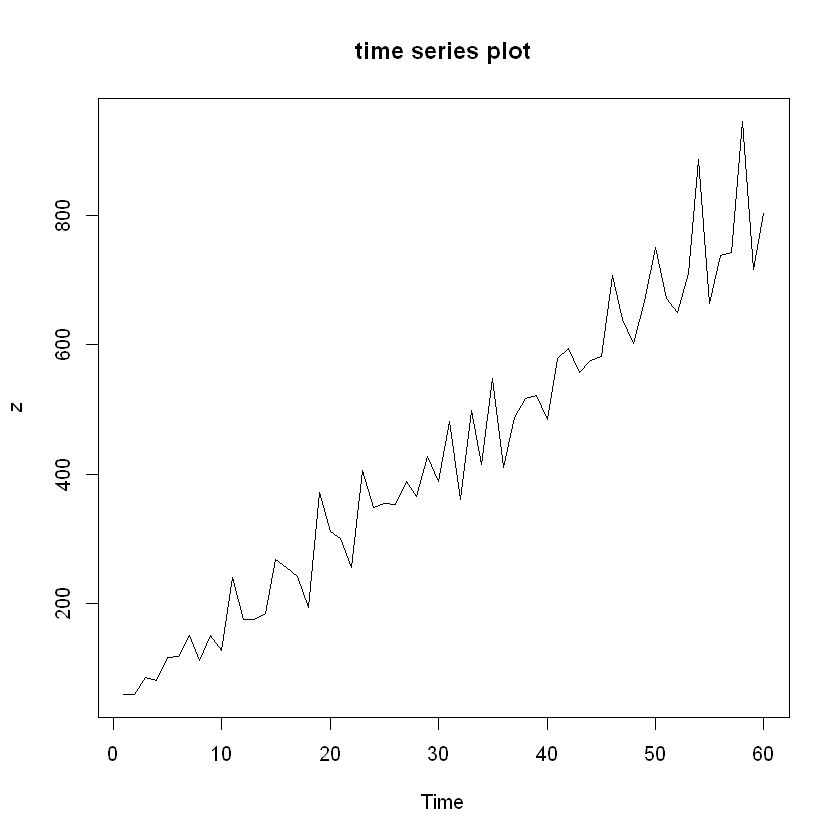

In [100]:
ts.plot(z, main = "time series plot")

- 비정상성이 존재한다. 
- 전체적으로 직선추세가 있고, 계절성과 이분산성이 의심된다.

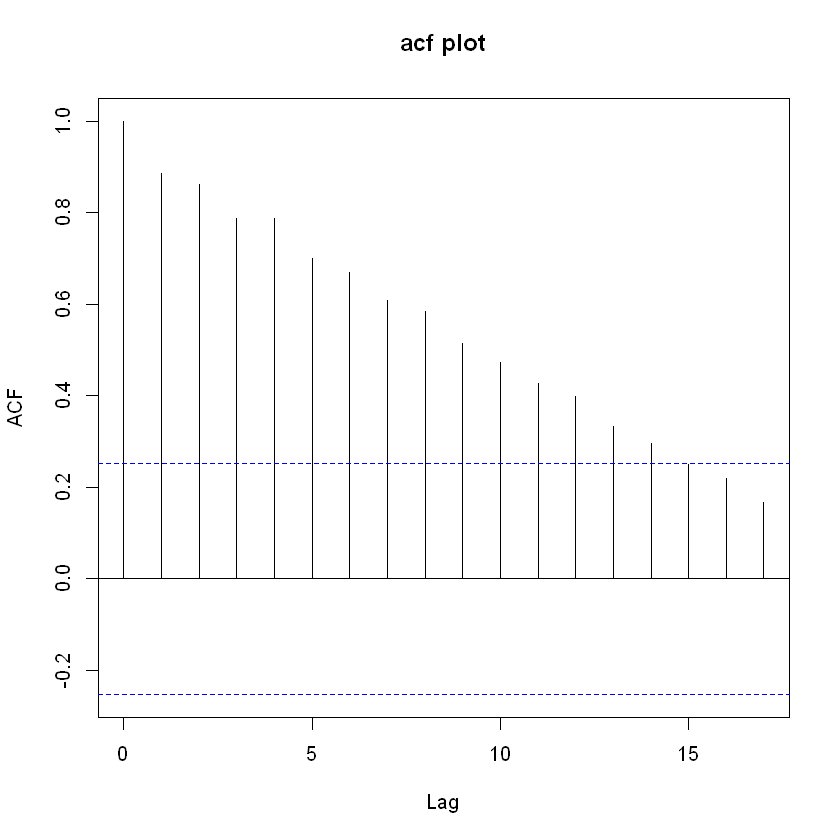

In [101]:
acf(z,main = "acf plot")

- acf plot을 그려보니 acf가 서서히 감소하고 있어 확률적 추세가 있으므로 차분을 해야한다.

#### (2) 1차 차분시계열

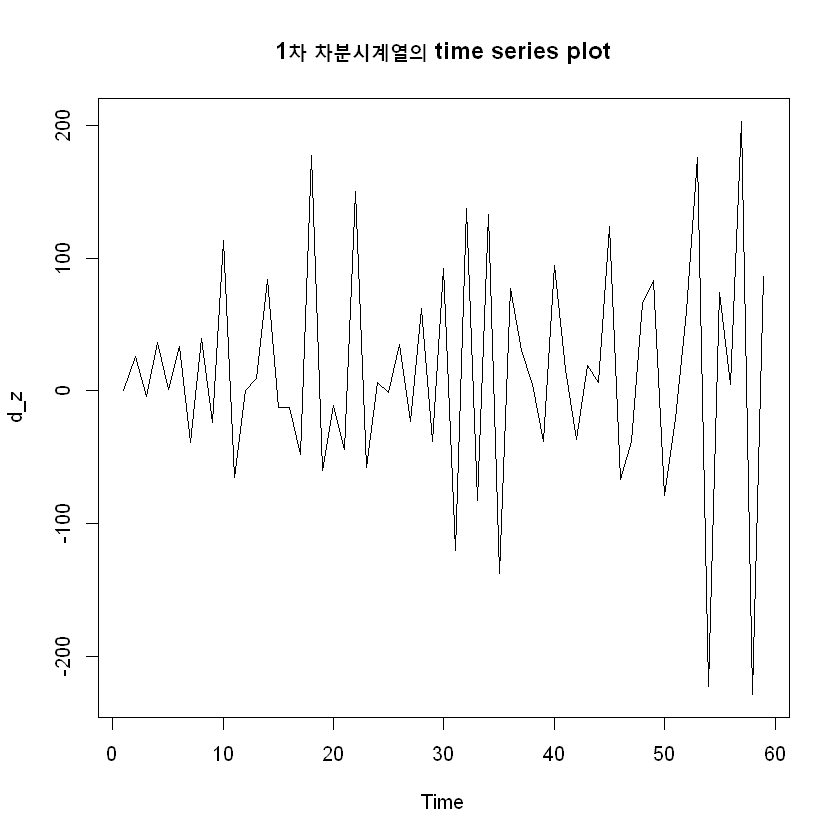

In [102]:
d_z = diff(z) # 1차 차분
ts.plot(d_z, main = "1차 차분시계열의 time series plot")

- 계절성분이 있는 거 같고, 이분산성도 의심된다.

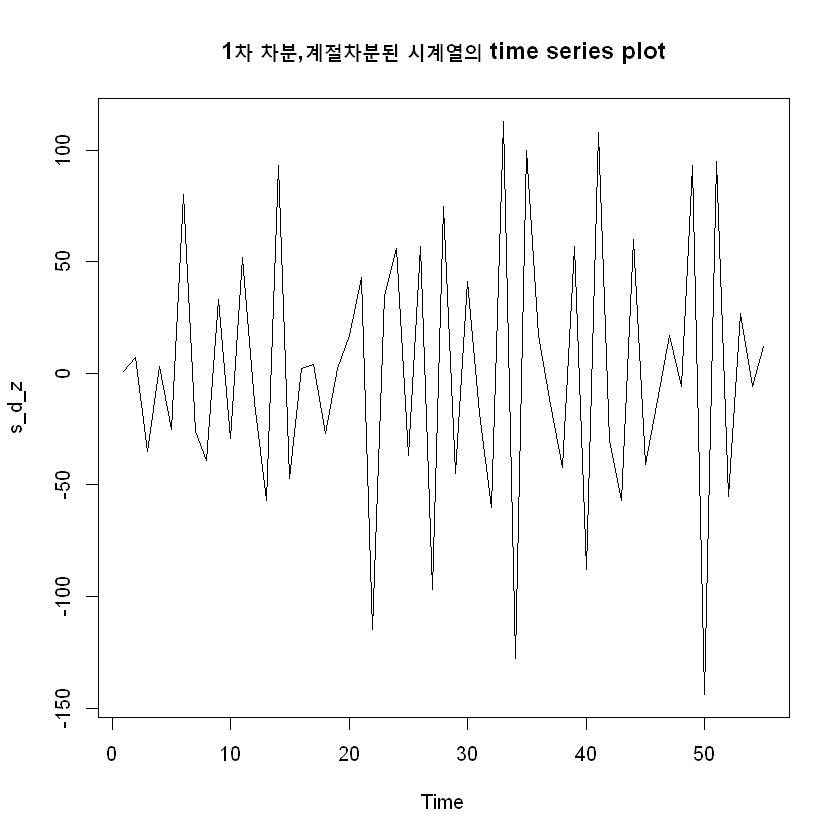

In [103]:
s_d_z = diff(d_z, lag=4) # 계절차분 , 주기 =4 
ts.plot(s_d_z, main = "1차 차분,계절차분된 시계열의 time series plot") 

- 이분산성이 의심된다.

#### (3) 계절차분 시계열

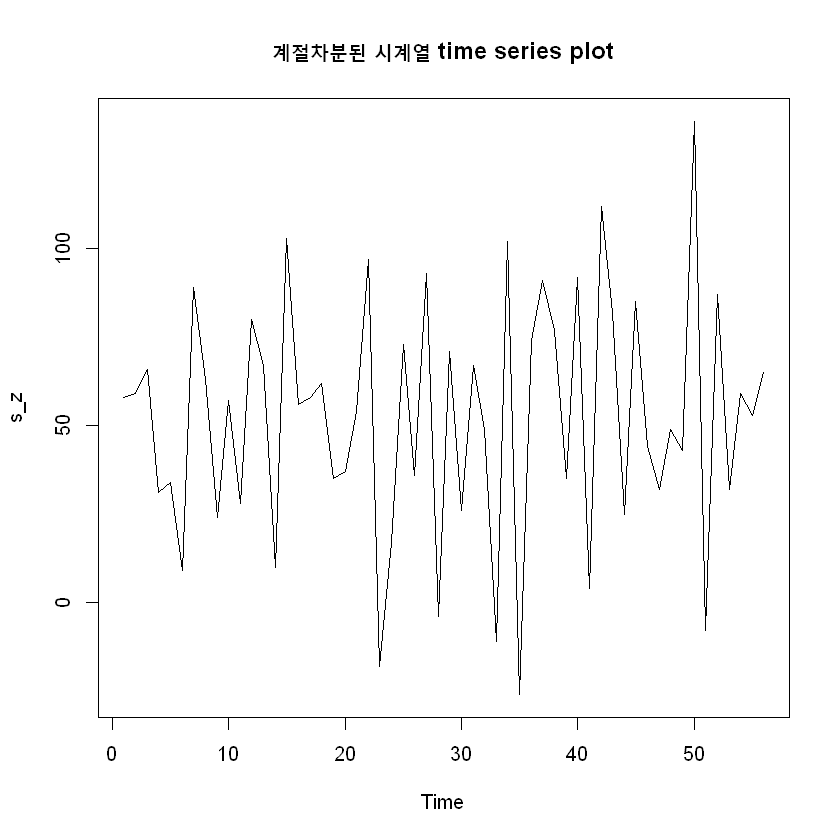

In [105]:
s_z = diff(z , lag = 4)
ts.plot(s_z , main = "계절차분된 시계열 time series plot")

- 추세와 계절성이 없고, 분산이 일정한 정상시계열처럼 보인다.

#### (4) 차분 순서에 따른 결과

In [113]:
print(paste("1차 차분, 계절차분 후 분산" ,round(var(s_d_z),2)  , ", 계절차분 후 분산" , round(var(s_z),2)))

[1] "1차 차분, 계절차분 후 분산 3582.89 , 계절차분 후 분산 1190.83"


- 원시계열은 추세, 계절성, 이분산성이 모두 있어보였다. 
- 원시계열에 1차 차분을 하고 계절차분을 했을 때는 이분산성이 남아있는 것처럼 보였다.
- 원시계열에 계절차분만 했을 때는 결과가 정상시계열인 것처럼 보였다.
- 계절차분의 항에는 1차 차분의 항이 포함되어있으므로 계절차분만으로도 비정상성을 없앨 수 있는 추세,계절성이 있는 시계열 data가 있다.
- 이 data의 경우 계절성과 추세가 있어보였지만, 계절차분만으로도 비정상성이 해결되었고, 1차 차분과 계절차분을 모두 했을 경우의 분산이 계절차분만 했을 때의 분산보다 더 큼을 알 수 있다. => 과대차분

### 5. `ex7_4`

In [114]:
z = scan("ex7_4.txt")

$(1-B^4)(1-B)Z_t = (1-0.5B)\epsilon_t$

#### (1) 시계열 그림

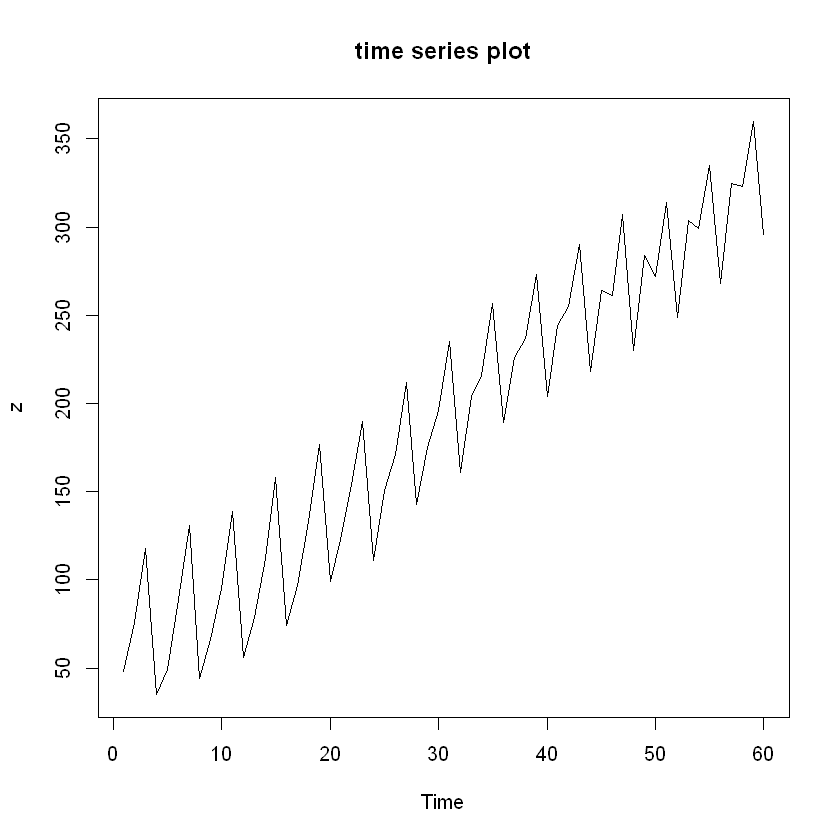

In [115]:
ts.plot(z, main = "time series plot")

- 비정상성이 존재한다.
- 전체적으로 직선 추세가 있고, 계절성이 있어보인다.

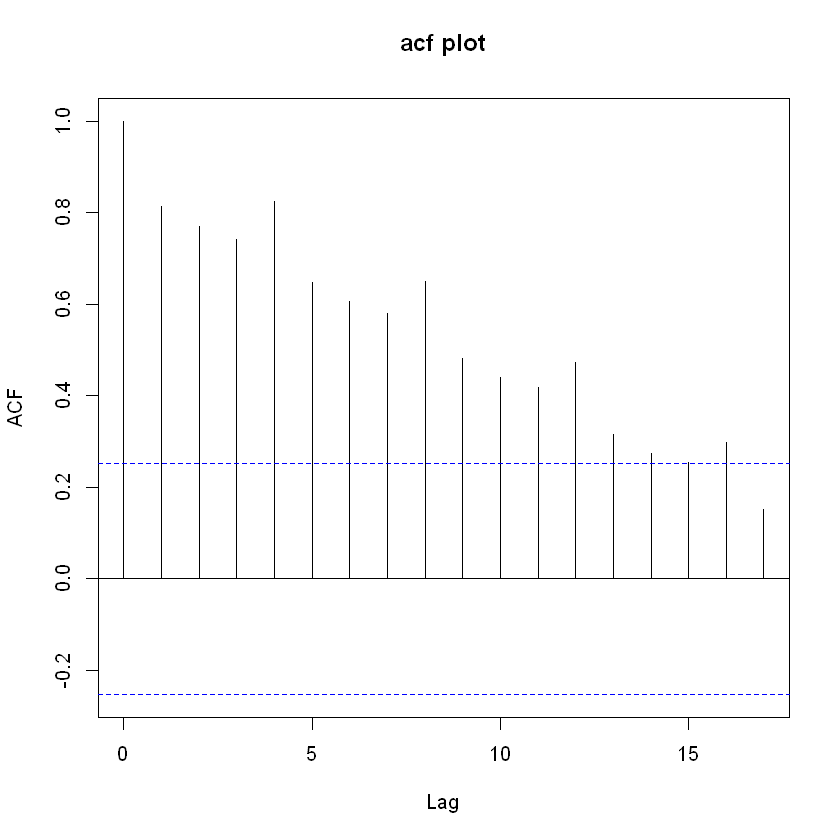

In [116]:
acf(z , main = "acf plot")

- acf가 서서히 감소하고 있는 것으로 보아 확률적 추세가 있고, 차분을 해야한다.

#### (2) 1차 차분된 시계열

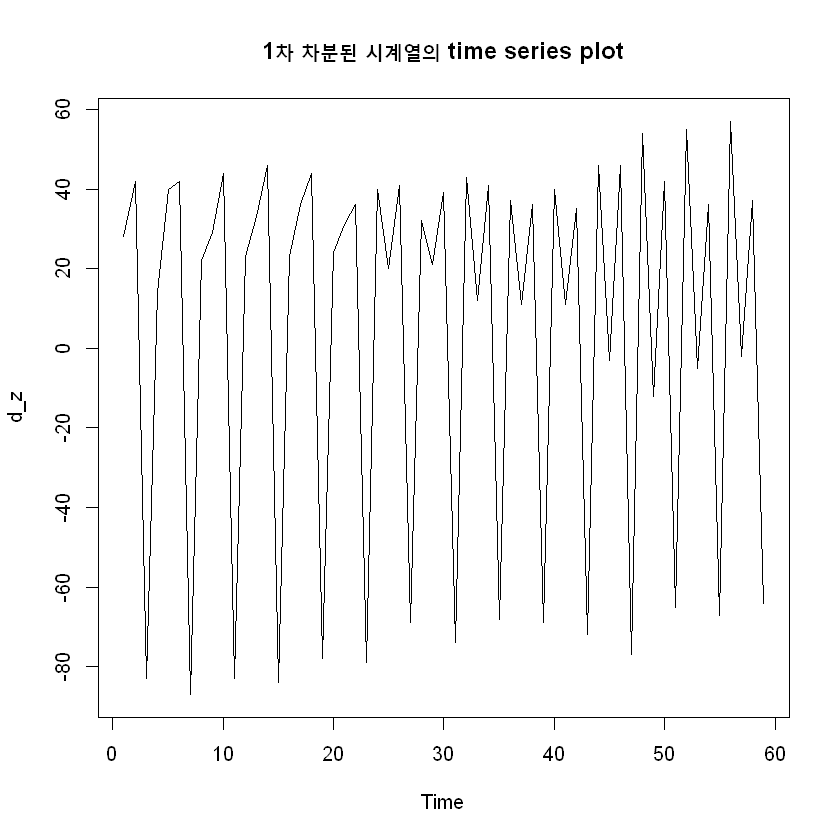

In [117]:
d_z = diff(z)
ts.plot(d_z , main = "1차 차분된 시계열의 time series plot")

- 1차 차분으로 직선 추세를 제거했다.
- 주기 4인 계절성분이 남아있다.

#### (3) 계절차분된 시계열

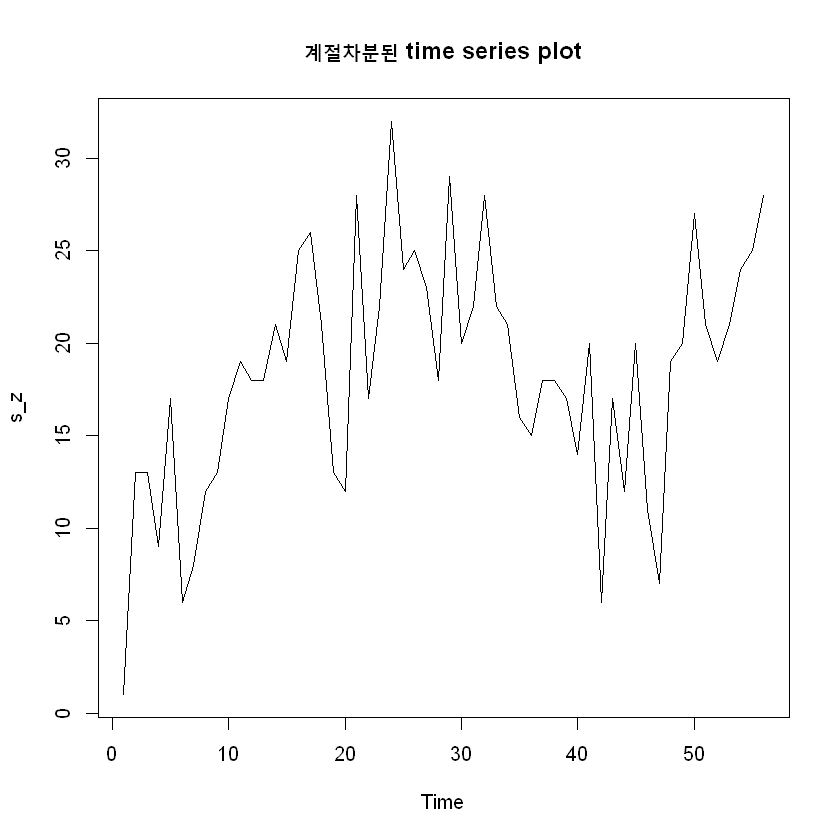

In [118]:
s_z = diff(z , lag = 4)
ts.plot(s_z , main = "계절차분된 time series plot")

- 주기4인 계절 차분을 하였으므로 계절성이 제거되었다.
- 시계열의 수준이 시간에 따라 달라보인다. -> 추세가 남아있다.

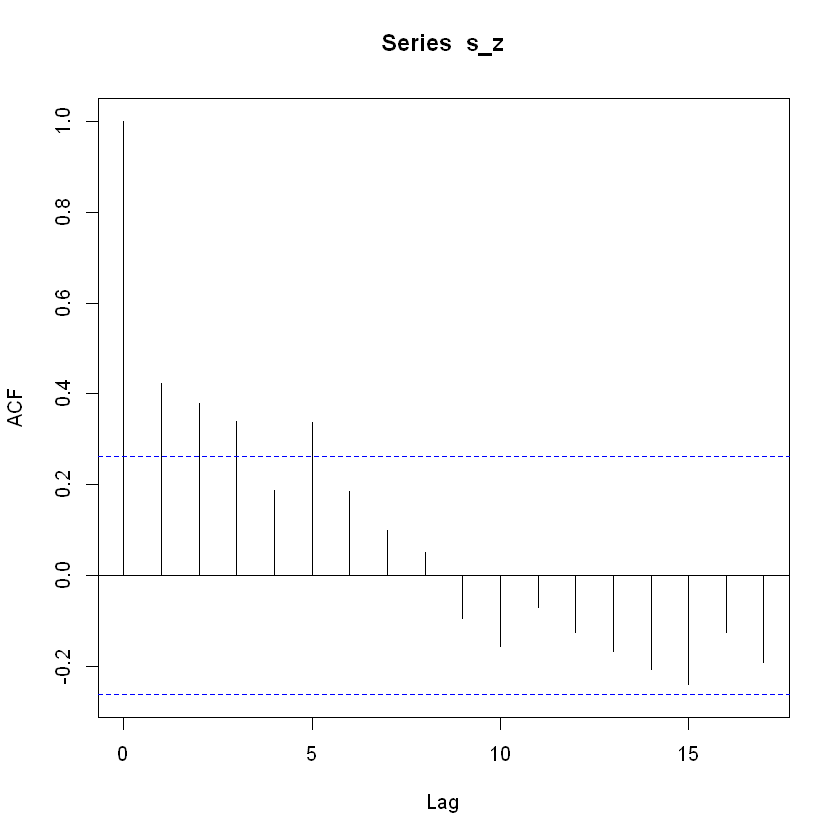

In [119]:
acf(s_z)

- 천천히 감소하고 있는 거 같아 확률적 추세가 남아있는 거 같다.
- 따라서 정상시계열이 되기 위해 차분을 더 해야한다.

#### (5) 1차 및 계절차분된 시계열

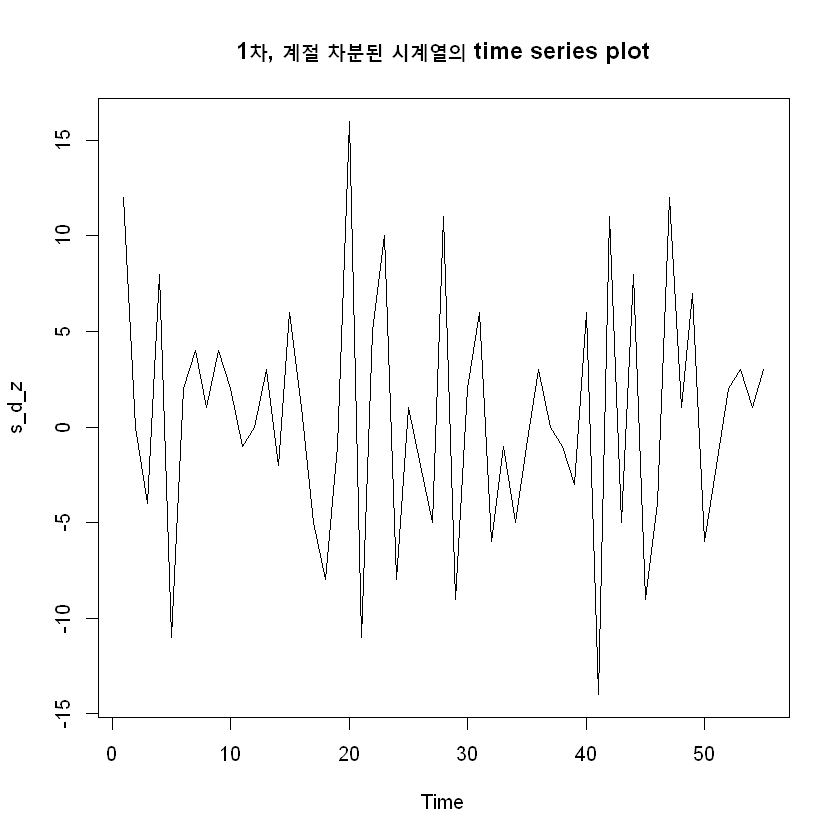

In [121]:
d_z = diff(z )
s_d_z = diff(d_z , lag = 4 )
ts.plot(s_d_z , main = "1차, 계절 차분된 시계열의 time series plot")

- 추세와 계절성분, 이분산성이 없어 정상 시계열처럼 보인다.

#### (5) 차분의 순서

- 1차 차분만 했더니 직선 추세는 사라졌지만, 계절성이 남았다.
- 주기4인 계절차분만 했더니 계절성은 사라졌지만, 확률적 추세성분이 남았다.
- 1차 차분 후 계절차분을 했더니 계절성과 추세성분이 모두 제거되고 정상 시계열처럼 보였다.

=> 계절차분으로 비정상성이 해결되는 data의 경우는 계절차분만 하고, 그렇지 않은 경우는 (1차)차분 후 계절차분을 해야 비정상성을 없앨 수 있다.

=> 한 단계씩 차분을 할 때마다 시계열도표를 확인하고 다음 차분을 결정해야한다.